In [1]:
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
import numpy as np # linear algebra
from sklearn.model_selection import GridSearchCV
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from libs.simple_analyzer import print_analytics

DATA = pd.read_csv("input/data.csv")
target_name = 'quality'

print('Done')

Done



# Exploring the Data, planning the preprocessing


In [2]:
# print_analytics(DATA, target_name)

# Data Pre-processing


In [3]:
# Let's run the preprocessing on both train and test data
from libs.simple_processing import normalize, separate_target, dropna_rows

X, y = separate_target(DATA, target_name)
X = dropna_rows(X, X.columns)

# Data Normalization
X = normalize(X)
# X_train.head()
print("Done")

Done


# Data Categorization


In [4]:
from libs.simple_processing import categorize
# X_train, X_valid = categorize(X_train, X_valid)
print("Not helpful. Done")

Not helpful. Done


as we can see the number of records in train data is lowered

In [5]:
from libs.simpleplotter import simple_heatmap
# simple_heatmap(X_train)

# Models Training & Hyper-params Tuning for Different Classification Models


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from libs.simple_processing import get_model_name, print_scores
from pandas import DataFrame
from sklearn.gaussian_process import GaussianProcessClassifier
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from libs.simple_hyper_tuner import gridsearchcv_tuner

params = [

#     # 0.8011627906976744
#     # {'max_depth': 10, 'n_estimators': 90}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=False),
#     #     'hyperparams': {
#     #         'n_estimators': range(20, 100, 10),
#     #         'max_depth': range(4, 10, 1)
#     #     }
#     # }
#     # 0.8069767441860465
#     # {'max_depth': 8, 'n_estimators': 120, 'random_state': 10}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True),
#     #     'hyperparams': {
#     #         'random_state': range(0, 60, 10),
#     #         'n_estimators': range(80, 150, 10),
#     #         'max_depth': range(7, 15, 1)
#     #     }
#     # }
#     # 0.8012311901504787
#     # {'ccp_alpha': 0.0, 'max_depth': 7, 'max_samples': 50, 'n_estimators': 110, 'random_state': 0}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True),
#     #     'hyperparams': {
#     #         'ccp_alpha': np.arange(0, 1, 0.2),
#     #         'max_samples': range(10, 80, 10),
#     #         'random_state': range(0, 30, 5),
#     #         'n_estimators': range(100, 140, 10),
#     #         'max_depth': range(7, 10, 1)
#     #     }
#     # }
#     # 0.8012995896032832
#     # {'max_depth': 6, 'max_samples': 65, 'n_estimators': 100, 'random_state': 0}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True),
#     #     'hyperparams': {
#     #         'max_samples': range(40, 70, 5),
#     #         'random_state': range(0, 30, 5),
#     #         'n_estimators': range(100, 130, 10),
#     #         'max_depth': range(5, 9, 1)
#     #     }
#     # }
#     # 0.8012995896032832
#     # {'max_depth': 6, 'max_samples': 65, 'n_estimators': 60}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, max_features="auto", bootstrap=True, random_state=0),
#     #     'hyperparams': {
#     #         'max_samples': range(50, 80, 5),
#     #         'n_estimators': range(40, 80, 10),
#     #         'max_depth': range(5, 9, 1)
#     #     }
#     # }
#     # 0.8012995896032832
#     # {'max_depth': 6, 'max_features': 'auto', 'max_samples': 65, 'n_estimators': 60}
#     # {
#     #     'model': RandomForestClassifier(criterion='entropy', n_jobs=3, bootstrap=True, oob_score=True, random_state=0),
#     #     'hyperparams': {
#     #         'max_features':["auto", "sqrt", "log2"],
#     #         'max_samples': range(50, 80, 5),
#     #         'n_estimators': range(40, 80, 10),
#     #         'max_depth': range(4, 8, 1)
#     #     }
#     # }
#     # 0.7370041039671682
#     # {'learning_rate': 0.09, 'max_depth': 6, 'n_estimators': 11, 'random_state': 5}
#     # {
#     #     'model': GradientBoostingClassifier(max_features="auto"),
#     #     'hyperparams': {
#     #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
#     #         'random_state': range(0, 30, 5),
#     #         'n_estimators': range(5, 15, 1),
#     #         'learning_rate': np.arange(0.01, 0.1, 0.01),
#     #         'max_depth': range(4, 8, 1)
#     #     }
#     # }
#     # 0.7954856361149111
#     # {'learning_rate': 1.0199999999999996, 'max_depth': 5, 'n_estimators': 12, 'random_state': 10}
#     # {
#     #     'model': GradientBoostingClassifier(max_features="auto"),
#     #     'hyperparams': {
#     #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
#     #         'random_state': range(0, 15, 5),
#     #         'n_estimators': range(10, 13, 1),
#     #         'learning_rate': np.arange(0.07, 1.2, 0.01),
#     #         'max_depth': range(5, 8, 1)
#     #     }
#     # }
#     # 0.8185362517099863
#     # {'learning_rate': 1.2, 'max_depth': 6, 'n_estimators': 80, 'random_state': 6}
#     # {
#     #     'model': GradientBoostingClassifier(max_features="auto"),
#     #     'hyperparams': {
#     #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
#     #         'random_state': range(0, 10, 2),
#     #         'n_estimators': range(20, 100, 10),
#     #         'learning_rate': np.arange(0.9, 1.5, 0.1),
#     #         'max_depth': range(4, 12, 2)
#     #     }
#     # }
#     # 0.8245554035567715
#     # {'criterion': 'mse', 'learning_rate': 1.2000000000000002, 'max_depth': 6, 'n_estimators': 75, 'random_state': 6}
#     {
#         'model': GradientBoostingClassifier(loss='deviance', max_features="auto"),
#         'hyperparams': {
#             'criterion': ['friedman_mse', 'mse', 'mae'],
#             # 'loss':['deviance', 'exponential'],
#             'random_state': range(5, 8, 1),
#             'n_estimators': range(60, 90, 5),
#             'learning_rate': np.arange(1, 1.4, 0.1),
#             'max_depth': range(4, 9, 1)
#         }
#     }
#     # {'learning_rate': 1.2000000000000002, 'max_depth': 7, 'n_estimators': 81, 'random_state': 5}
#     # {
#     #     'model': GradientBoostingClassifier(criterion='mse', loss='deviance', max_features="auto"),
#     #     'hyperparams': {
#     #         # 'criterion': ['friedman_mse', 'mse', 'mae'],
#     #         # 'loss':['deviance', 'exponential'],
#     #         'random_state': range(0, 10, 2),
#     #         'n_estimators': range(80, 85, 1),
#     #         'learning_rate': np.arange(1, 1.4, 0.1),
#     #         'max_depth': range(6, 11, 1)
#     #     }
#     # }
#     # cv=3
#     # train / test: 50 / 50
#     {
#         'model': GradientBoostingClassifier(criterion='mse', loss='deviance', max_features="auto"),
#         'hyperparams': {
#             'random_state': range(0, 10, 2),
#             'n_estimators': range(80, 83, 1),
#             'learning_rate': np.arange(1, 1.4, 0.1),
#             'max_depth': range(6, 9, 1)
#         }
#     }
#         {
#             'model': SMOTE(loss='deviance', criterion='mse', random_state=6, n_estimators=75, learning_rate=1.2, max_depth=6, max_features='log2'),
#             'hyperparams': {
#                 'max_features': ['auto', 'log2', 2, 6, 10]
#             }
#         }


    # MULTICLASS:
    # 0.5160309076682316
    # {'copy_X_train': True, 'max_iter_predict': 1, 'multi_class': 'one_vs_one', 'n_restarts_optimizer': 0, 'random_state': 0, 'warm_start': False}
    #     {
    #         'model': GaussianProcessClassifier(),
    #         'hyperparams': {
    #             'copy_X_train': [True, False],
    #             'multi_class': ['one_vs_rest', 'one_vs_one'],
    #             'random_state': range(0, 3, 1),
    #             'n_restarts_optimizer': range(0, 3, 1),
    #             'max_iter_predict': range(0, 3, 1),
    #             'warm_start': [True, False]
    #         }
    #     }
    # 0.5676386443661972
    # {'C': 1.2000000000000002, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg', 'warm_start': True}
    #     {
    #         'model': LogisticRegression(),
    #         'hyperparams': {
    #             'C': np.arange(0.6, 1.4, 0.2),
    #             'multi_class': ['auto', 'ovr', 'warn'],
    #             'random_state': range(0, 12, 2),
    #             'penalty': ['l2'],
    #             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #             'warm_start': [True, False]
    #         }
    #     }
    # 0.5871752450980392
    # {'C': 1.4, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 0, 'warm_start': True}, cv=5
    #     {
    #         'model': LogisticRegression(solver='newton-cg'),
    #         'hyperparams': {
    #             'C': np.arange(1, 2, 0.2),
    #             'multi_class': ['auto', 'ovr', 'warn'],
    #             'random_state': range(0, 8, 2),
    #             'penalty': ['l1', 'l2'],
    #             # 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #             'warm_start': [True, False]
    #         }
    #     }
    # 0.5660834800469483
    # {'eta0': 0.03, 'fit_intercept': True, 'learning_rate': 'adaptive', 'loss': 'hinge', 'max_iter': 500, 'penalty': 'l1', 'random_state': None, 'shuffle': False}
    #     {
    #         'model': SGDClassifier(),
    #         'hyperparams': {
    #             # 'alpha': np.arange(0.0001, 0.001, 0.0003),
    #             # 'tol': np.arange(0.001, 0.01, 0.003),
    #             'eta0': np.arange(0.0, 0.1, 0.03),
    #             'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    #             'max_iter': range(500, 1500, 200),
    #             'random_state': [None, 0, 4, 10, 20],
    #             'penalty': ['l1', 'l2'],
    #             # 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #             'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    #             'shuffle': [True, False],
    #             'fit_intercept': [True, False]
    #         }
    #     }
    # 0.5723359252738653
    # {'alpha': 0.00030000000000000003, 'fit_intercept': True, 'learning_rate': 'adaptive', 'loss': 'log', 'shuffle': False, 'tol': 0.002}
    #     {
    #         'model': SGDClassifier(eta0=0.03, penalty='l1', max_iter=55000, random_state=None),
    #         'hyperparams': {
    #             'alpha': np.arange(0.0001, 0.0005, 0.0001),
    #             'tol': np.arange(0.001, 0.005, 0.001),
    #             'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    #             # 'max_iter': range(500, 1500, 200),
    #             # 'random_state': [None, 0, 4, 10, 20],
    #             # 'penalty': ['l1', 'l2'],
    #             'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    #             'shuffle': [True, False],
    #             'fit_intercept': [True, False]
    #         }
    #     }

    # 0.612987822769953
    # {'criterion': 'friedman_mse', 'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 80, 'random_state': 7}
    #     {
    #         'model': GradientBoostingClassifier(loss='deviance', max_features="auto"),
    #         'hyperparams': {
    #             'criterion': ['friedman_mse', 'mse', 'absolute_error'],
    #             # 'loss':['deviance', 'exponential'],
    #             'random_state': range(5, 15, 2),
    #             'n_estimators': range(75, 85, 2),
    #             'learning_rate': np.arange(0.8, 1.2, 0.1),
    #             'max_depth': range(4, 7, 1)
    #         }
    #     }
    # 0.6122016823161189
    # {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 84, 'random_state': 5}
#          > Model: GradientBoostingClassifier
# Fitting 2 folds for each of 192 candidates, totalling 384 fits
# 0.6122016823161189
# {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 84, 'random_state': 5}
    #     {
    #         'model': GradientBoostingClassifier(max_features="auto", criterion="friedman_mse"),
    #         'hyperparams': {
    #             # 'criterion': ['friedman_mse', 'mse', 'absolute_error'],
    #             # 'loss':['deviance', 'exponential'],
    #             'random_state': range(5, 15, 3),
    #             'n_estimators': range(75, 85, 3),
    #             'learning_rate': np.arange(0.8, 1.2, 0.1),
    #             'max_depth': range(4, 7, 1)
    #         }
    #     }

    #      > Model: GradientBoostingClassifier cv:  4
    #     0.6317300156739812
    #     {'random_state': 25}
    # - F1 score:  0.7127565219911619
    # {
    #     'splitter': {
    #         'train_size': [0.8],
    #         'random_state': [40, 50]
    #     },
    #     'cv': [5],
    #     'model': GradientBoostingClassifier(n_estimators=55, loss='deviance', learning_rate=0.9, max_depth=6, max_features='log2', random_state=25),
    #     'hyperparams': {
    #         'learning_rate':np.arange(0.1, 1, 0.1)
    #     }
    # }

    # - F1 score:  0.7211048661042033
    # Params:
    # - cv:  5
    #    - Splitter Params:  {'train_size': 0.8, 'random_state': 50}
    #                        - Best H-Params:  {'learning_rate': 0.11, 'max_depth': 7, 'n_estimators': 35, 'random_state': 30}
    # {
    #     'splitter': {
    #         'train_size': [0.8],
    #         'random_state': [50]
    #     },
    #     'cv': [5],
    #     'model': GradientBoostingClassifier(n_estimators=55, loss='deviance', max_features='log2', random_state=25),
    #     'hyperparams': {
    #         'n_estimators': range(20, 60, 5),
    #         'max_depth': range(3, 9, 2),
    #         'random_state': [10, 20, 25, 30],
    #         'learning_rate':np.arange(0.09, 0.2, 0.02)
    #     }
    # }

    # - F1 score:  0.7211048661042033
    #     Params:
    #     - cv:  5
    #    - Splitter Params:  {'train_size': 0.8, 'random_state': 50}
    #                        - Best H-Params:  {'learning_rate': 0.11, 'max_depth': 7}
    # {
    #     'splitter': {'train_size': [0.8], 'random_state': [50]},
    #     'cv': [5],
    #     'model': GradientBoostingClassifier(n_estimators=35, loss='deviance', max_features='log2', random_state=30),
    #     'hyperparams': {
    #         'max_depth': range(5, 9, 1),
    #         'learning_rate':np.arange(0.1, 0.13, 0.01)
    #     }
    # }
    {
        'splitter': {'train_size': [0.8], 'random_state': [50]},
        'cv': [5],
        'model': GradientBoostingClassifier(max_depth=7, learning_rate=0.11, n_estimators=35, loss='deviance', max_features='log2', random_state=30
                                            # , min_impurity_decrease=0, min_weight_fraction_leaf=0
                                            # , min_samples_split=4, min_samples_leaf=1, criterion="friedman_mse", subsample=0.7
                                            , n_iter_no_change=1
                                            # , tol=0.0001
                                            ),
        'hyperparams': {
            # 'min_samples_split':np.arange(3, 6, 1),
            # 'min_samples_leaf':np.arange(1, 4, 1),
            # 'subsample':np.arange(0.6, 0.9, 0.1),
            # 'criterion': ['friedman_mse', 'squared_error'],
            'max_depth': range(5, 8, 1)
            # , 'learning_rate':np.arange(0.09, 0.13, 0.01)
            # , 'min_weight_fraction_leaf':np.arange(0, 0.14, 0.02)
            # , 'min_impurity_decrease':np.arange(0, 0.14, 0.02)
            #  , 'max_leaf_nodes':range(1, 7, 1)
            # , 'warm_start': [True, False]
            # , 'validation_fraction': np.arange(0, 0.005, 0.001)
            # , 'tol': np.arange(0, 0.005, 0.001)
            # , 'ccp_alpha': np.arange(0, 0.005, 0.001)
            # , 'n_iter_no_change':range(1, 7, 1)

        }
    }
]

winner = gridsearchcv_tuner(X, y, params)

# from libs.simple_hyper_tuner import gridsearchcv_print_valid_scores
# gridsearchcv_print_valid_scores(winner, X, y)


> Model: GradientBoostingClassifier
GridSearchCV Training Results:
- Best Score:  0.6465992647058824
Validation Results:
- Accuracy score:  0.728125
- Accuracy count:  233 / 320
- Precision score:  0.7206890443313954
- Recall score:  0.728125
- F1 score:  0.721640208070996
Params:
- cv:  5
- Splitter Params:  {'train_size': 0.8, 'random_state': 50}
- Model Params:  GradientBoostingClassifier(learning_rate=0.11, max_depth=7, max_features='log2',
                           n_estimators=35, n_iter_no_change=1,
                           random_state=30)
- Best H-Params:  {'max_depth': 7}

Done.


/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Validation Results:
- Accuracy score:  0.728125
- Accuracy count:  233 / 320
- Precision score:  0.7206890443313954
- Recall score:  0.728125
- F1 score:  0.721640208070996
Done


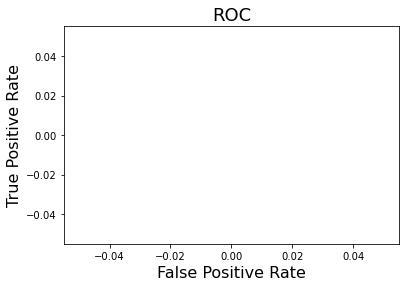

In [12]:
from libs.simple_hyper_tuner import predict_print_valid_scores
from libs.simpleplotter import simple_roc
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=50)
X_train, X_valid = categorize(X_train, X_valid)

model = GradientBoostingClassifier(max_depth=7, learning_rate=0.11, n_estimators=35, loss='deviance', max_features='log2', random_state=30, n_iter_no_change=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
simple_roc(y_valid, y_pred)

print("Validation Results:")
f1 = predict_print_valid_scores(model, X_valid, y_valid)

print("Done")


In [8]:
# from libs.single_scoring import get_scoring
# parameters = [
# #     params:  {'n_estimators': 450, 'learning_rate': 0.035, 'max_depth': 6}
# # => train data: 0.973 val data: 0.716
# #     {
# #         'modelName': globals()["GradientBoostingClassifier"],
# #         'rnames': ['n_estimators', 'learning_rate', 'max_depth'],
# #         'rvalues': [range(150, 500, 100), np.arange(0.02, 0.04, 0.005), range(4, 7, 1)],
# #         'pnames': [],
# #         'pvalues': []
# #     }
#     {
#         'modelName': globals()["GradientBoostingClassifier"],
#         'rnames': ['n_estimators', 'learning_rate', 'max_depth'],
#         'rvalues': [range(350, 1000, 100), np.arange(0.03, 0.08, 0.01), range(5, 9, 1)],
#         'pnames': [],
#         'pvalues': []
#     }
#     # {
#     #     'modelName': GradientBoostingClassifier(),
#     #     'rnames': ['n_estimators', 'learning_rate', 'max_depth'],
#     #     'rvalues': [range(350, 1000, 100), np.arange(0.03, 0.08, 0.01), range(5, 9, 1)],
#     #     'pnames': ['criterion'],
#     #     'pvalues': ["mse"]
#     # }
# ]
#
# for p in parameters:
#     score = get_scoring(X_train, y_train, X_valid, y_valid, p['modelName'], p['rnames'], p['rvalues'], p['pnames'], p['pvalues'])
#
#
print("Done")


Done


In [89]:
# FROM GRIDSEARCHCV

    # 0.8245554035567715
#     # {'criterion': 'mse', 'learning_rate': 1.2000000000000002, 'max_depth': 6, 'n_estimators': 75, 'random_state': 6}
# {'criterion': 'mse', 'learning_rate': 1.2000000000000002, 'max_depth': 6, 'n_estimators': 75, 'random_state': 6}

#     BEST params:  {'n_estimators': 90, 'learning_rate': 0.7, 'max_depth': 11}
# => train data: 1.000 val data: 0.756
#     {
#         'modelName': globals()["GradientBoostingClassifier"],
#         'hyperParamNames': ['n_estimators', 'learning_rate', 'max_depth'],
#         'hyperParamValues': [range(80, 110, 10), np.arange(0.5, 0.8, 0.1), range(8, 12, 1)],
#         'params': {'max_features': "auto", "n_jobs": 3, 'criterion': 'mse'}
#     }

model = GradientBoostingClassifier(max_features="auto", criterion='squared_error', learning_rate=0.01, max_depth=4, n_estimators=380, random_state=100)
model.fit(X_train, y_train)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))
yt_pred = model.predict(X_train)
y_pred = model.predict(X_valid)
df = DataFrame([y_valid, y_pred] )
print(y_train)
print(yt_pred)
df.head()


train Score:  0.8764659890539483
val Score:  0.6875
919     6
223     6
994     5
918     6
1171    6
       ..
1016    7
165     5
7       7
219     5
1350    5
Name: quality, Length: 1279, dtype: int64
[6 6 5 ... 7 5 5]


,1035,49,799,538,660,990,398,1068,1155,468,...,1525,942,236,772,442,1335,1027,34,504,1491
quality,7.0,5.0,6.0,7.0,6.0,5.0,6.0,7.0,5.0,6.0,...,5.0,7.0,6.0,5.0,7.0,6.0,5.0,5.0,7.0,5.0
Unnamed 0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [18]:
output = pd.DataFrame({'y_valid': y_valid, 'y_pred': y_pred})
output


,y_valid,y_pred
1035,7,6
49,5,5
799,6,6
538,7,6
660,6,6
...,...,...
1335,6,6
1027,5,6
34,5,5
504,7,6


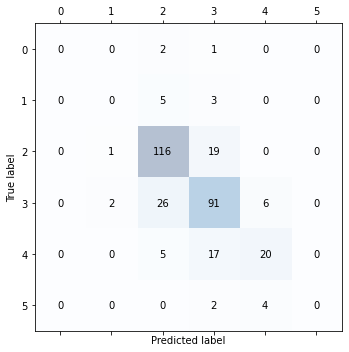

array([[  0,   0,   2,   1,   0,   0],
       [  0,   0,   5,   3,   0,   0],
       [  0,   1, 116,  19,   0,   0],
       [  0,   2,  26,  91,   6,   0],
       [  0,   0,   5,  17,  20,   0],
       [  0,   0,   0,   2,   4,   0]])

In [20]:
from libs.simpleplotter import simple_confusion_matrix

simple_confusion_matrix(y_valid, y_pred, winner.classes_)

## Score


In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))

train Score:  0.5840500390930414
val Score:  0.628125


/Users/kkepins-macwro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# BEST params:  {'n_estimators': 110, 'bootstrap': False, 'max_depth': 9}
# => train data: 0.934 val data: 0.731
# {
#     'modelName': globals()["RandomForestClassifier"],
#     'hyperParamNames': ['n_estimators', 'bootstrap', 'max_depth'],
#     'hyperParamValues': [range(80, 140, 10), [True, False], range(7, 10, 1)],
#     'params': {'random_state': 0, "n_jobs": 3, 'criterion': 'gini', 'max_leaf_nodes': 19}
# }
model = RandomForestClassifier(criterion='gini', max_depth=9, n_estimators=110, n_jobs=3, random_state=0, max_leaf_nodes=19)
model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))

train Score:  0.6825645035183737
val Score:  0.653125


In [9]:
from libs.simple_processing import print_scores

model = KNeighborsClassifier(n_jobs=4, n_neighbors=19)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))

NameError: name 'KNeighborsClassifier' is not defined

In [8]:
model = GaussianNB()
model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))

NameError: name 'GaussianNB' is not defined

In [10]:
from libs.simpleplotter import decision_tree
model = DecisionTreeClassifier(max_depth=9, random_state=0, max_leaf_nodes=9 )
model.fit(X_train, y_train)
# y_pred = model.predict(X_valid)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))
# decision_tree(model, X_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
# BEST params:  {'n_estimators': 130, 'learning_rate': 0.8999999999999999, 'max_depth': 11}
# => train data: 1.000 val data: 0.738
model = GradientBoostingClassifier(max_features="auto", learning_rate=1.2, max_depth=6, n_estimators=80)
model.fit(X_train, y_train)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))


# Winner

In [ ]:
model = GradientBoostingClassifier(max_features="auto", criterion='mse', learning_rate=0.7, max_depth=11, n_estimators=90, random_state=6)
model.fit(X_train, y_train)
# print_scores(y_valid, y_pred)
print('train Score: ', model.score(X_train, y_train))
print('val Score: ', model.score(X_valid, y_valid))


## Receiver Operating Characteristic (ROC)

In [11]:
from libs.simpleplotter import simple_roc

simple_roc(y_valid, y_pred)

NameError: name 'y_pred' is not defined

## Confusion Matrix / Macierz pomyłek

In [ ]:
from libs.simpleplotter import simple_confusion_matrix
conf_matrix = simple_confusion_matrix(y_valid, y_pred, model.classes_)

## Which features became decision makers for the model?

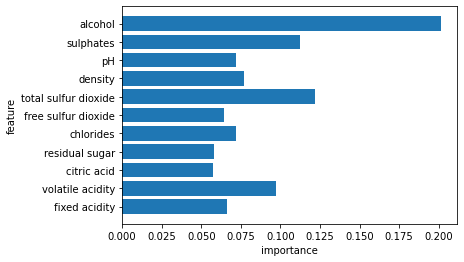

In [27]:
from libs.simpleplotter import feature_importance

feature_importance(winner, X_train)

# Generating Model Predictions For Test Data & Saving the results for Kaggle Competition

In [ ]:
# y_pred = winner.predict(X)
# output = pd.DataFrame({'Id': Ids, 'Species': y_pred})
#
# print_scores(y, y_pred)
# output.to_csv('./submission.csv', index=False)
# SUBMISSION = pd.read_csv("./submission.csv")
# SUBMISSION